In [3]:
pip install keras-targeted-dropout

In [17]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
# import librarys
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
#from keras.models import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib.pyplot as plt
import datetime
plt.style.use('fivethirtyeight')

In [3]:
#get stock price
msftdf = web.DataReader('MSFT', data_source='yahoo', start='2019-01-01', end='2021-05-01')

msftdf

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,101.750000,98.940002,99.550003,101.120003,35329300.0,98.375481
2019-01-03,100.190002,97.199997,100.099998,97.400002,42579100.0,94.756454
2019-01-04,102.510002,98.930000,99.720001,101.930000,44060600.0,99.163513
2019-01-07,103.269997,100.980003,101.639999,102.059998,35656100.0,99.289970
2019-01-08,103.970001,101.709999,103.040001,102.800003,31514400.0,100.009888
...,...,...,...,...,...,...
2021-04-26,262.440002,260.170013,261.660004,261.549988,19763300.0,261.549988
2021-04-27,263.190002,260.119995,261.579987,261.970001,31014200.0,261.970001
2021-04-28,256.540009,252.949997,256.079987,254.559998,46903100.0,254.559998


In [4]:
#check shape of data
msftdf.shape

(587, 6)

In [5]:
#check NAs
msftdf.isna().any()

High         False
Low          False
Open         False
Close        False
Volume       False
Adj Close    False
dtype: bool

In [6]:
msftdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 587 entries, 2019-01-02 to 2021-04-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       587 non-null    float64
 1   Low        587 non-null    float64
 2   Open       587 non-null    float64
 3   Close      587 non-null    float64
 4   Volume     587 non-null    float64
 5   Adj Close  587 non-null    float64
dtypes: float64(6)
memory usage: 32.1 KB


<AxesSubplot:xlabel='Date'>

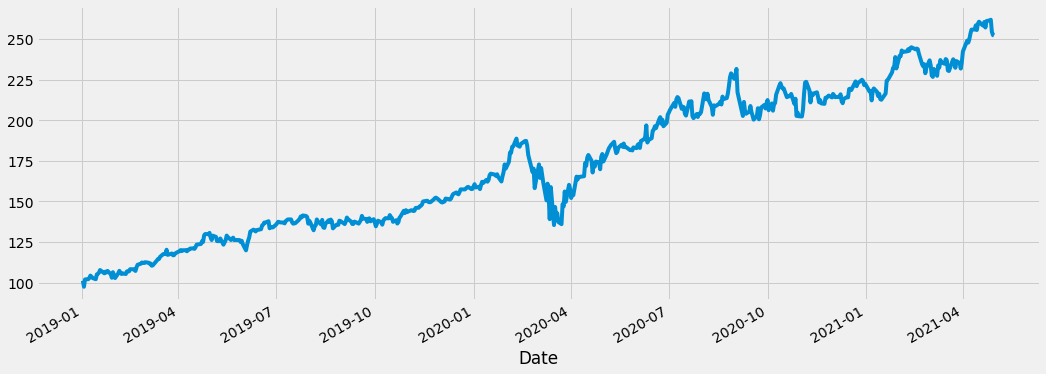

In [7]:
msftdf['Close'].plot(figsize=(16,6))

In [8]:
#remove first 6 days, take mean of previous 7

msftdf.rolling(7).mean().head(40)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-08,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-10,102.902857,100.482857,101.590001,101.882857,3.592684e+07,99.117642
2019-01-11,103.144286,100.868571,102.110001,102.122857,3.492469e+07,99.351129
2019-01-14,103.527143,101.448571,102.367144,102.787143,3.290440e+07,99.997385


<AxesSubplot:xlabel='Date'>

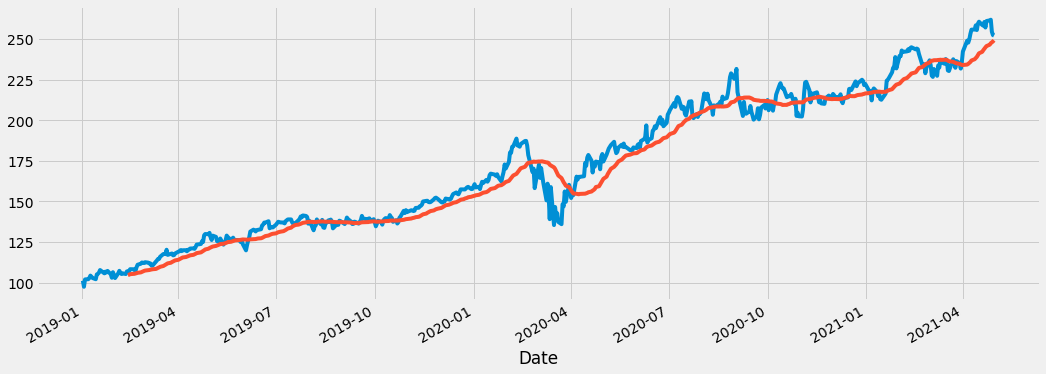

In [9]:
#moving avg of last 30 days
msftdf['Close'].plot(figsize=(16,6))
msftdf.rolling(window=30).mean()['Close'].plot()

<AxesSubplot:xlabel='Date'>

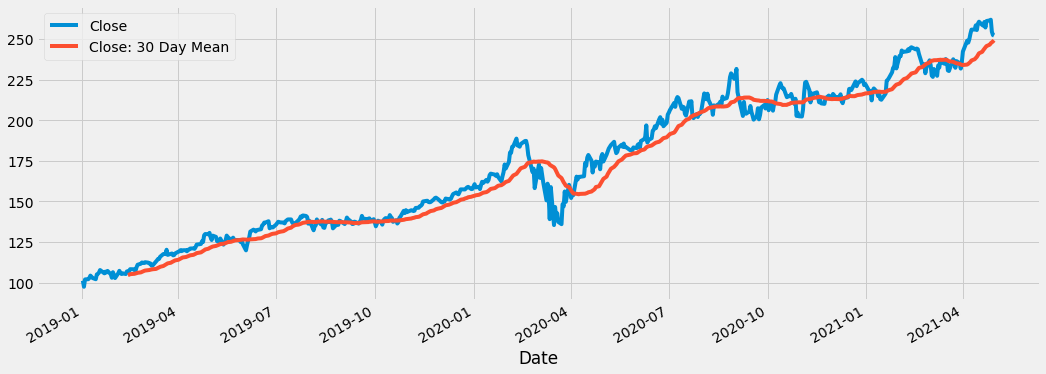

In [10]:
#close column vs 7 day moving avg
msftdf['Close: 30 Day Mean'] = msftdf['Close'].rolling(window=30).mean()
msftdf[['Close', 'Close: 30 Day Mean']].plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

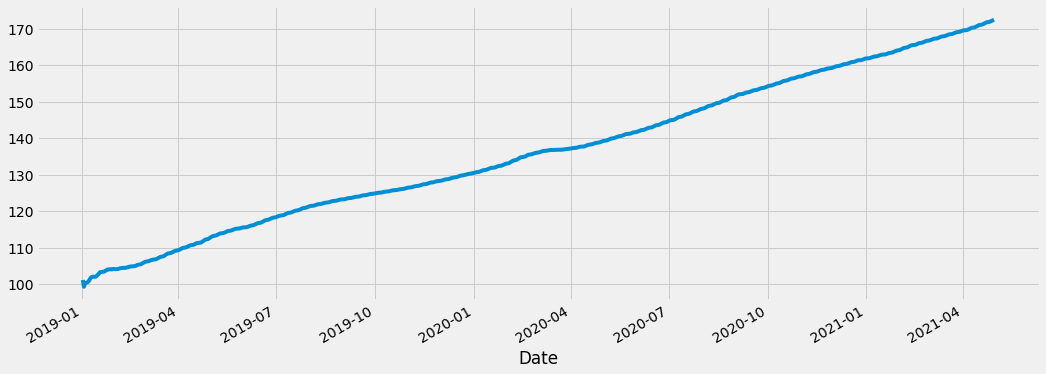

In [11]:
msftdf['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [28]:
#create training data
train_data=msftdf['Close']
train_data=pd.DataFrame(train_data)

train_data.head()

,Close
Date,
2019-01-02,101.120003
2019-01-03,97.400002
2019-01-04,101.930000
2019-01-07,102.059998
2019-01-08,102.800003


In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

In [33]:
sc = MinMaxScaler(feature_range = (0,1))
train_data_scaled = sc.fit_transform(train_data)

In [34]:
X_train = []
y_train = []
for i in range (60, 587):
    X_train.append(train_data.iloc[i-60:i, 0])
    y_train.append(train_data.iloc[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [35]:
from keras.models import Sequential

In [36]:
#initalize RNN

regressor = Sequential()

In [37]:
#First layer of LSTM

#regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#regressor.add(Dropout(0.2))

#Second layer of LSTM
#regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

#Third layer
#regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

#4th Layer
#regressor.add(LSTM(units = 50, return_sequences = False))
#regressor.add(Dropout(0.2))

#output layer
#regressor.add(Dense(units = 1))


In [ ]:
#second attempt at model 
regressor.add(LSTM(50, return_sequences=True, input_shape= (X_train.shape[1], 1)))
regressor.add(LSTM(50, return_sequences=True))
regressor.add(LSTM(50, return_sequences=False))
regressor.add(Dense(25))
regressor.add(Dense(1))

In [40]:
#Compile model
regressor.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
regressor.fit(X_train, y_train, batch_size=64, epochs=100)



Epoch 1/100
9/9 [==============================] - 13s 175ms/step - loss: 3917.8240
Epoch 2/100
9/9 [==============================] - 2s 170ms/step - loss: 3869.3603
Epoch 3/100
9/9 [==============================] - 1s 144ms/step - loss: 3831.54401s -
Epoch 4/100
9/9 [==============================] - 1s 136ms/step - loss: 3991.4186
Epoch 5/100
9/9 [==============================] - 1s 121ms/step - loss: 3844.7682
Epoch 6/100
9/9 [==============================] - 1s 126ms/step - loss: 3682.8881
Epoch 7/100
9/9 [==============================] - 1s 126ms/step - loss: 3781.7442
Epoch 8/100
9/9 [==============================] - 1s 124ms/step - loss: 3682.9438
Epoch 9/100
9/9 [==============================] - 1s 124ms/step - loss: 3568.8291
Epoch 10/100
9/9 [==============================] - 1s 152ms/step - loss: 3619.7162
Epoch 11/100
9/9 [==============================] - 1s 124ms/step - loss: 3554.2468
Epoch 12/100
9/9 [==============================] - 1s 106ms/step - loss: 3516.3

9/9 [==============================] - 1s 108ms/step - loss: 1914.2928
Epoch 99/100
9/9 [==============================] - 1s 101ms/step - loss: 1845.6540
Epoch 100/100
9/9 [==============================] - 1s 108ms/step - loss: 1811.6571


In [46]:
real_data = msftdf.iloc[:,1:2].values

In [47]:
test_set = msftdf['Close']

test_set = pd.DataFrame(test_set)

In [48]:
test_set.head()

,Close
Date,
2019-01-02,101.120003
2019-01-03,97.400002
2019-01-04,101.930000
2019-01-07,102.059998
2019-01-08,102.800003


In [29]:
train_data.head()

,Close
Date,
2019-01-02,101.120003
2019-01-03,97.400002
2019-01-04,101.930000
2019-01-07,102.059998
2019-01-08,102.800003


In [50]:
final_dataset = pd.concat((msftdf['Close'], test_set['Close']), axis = 0)
inputs = final_dataset[len(final_dataset) - len(test_set) - 60:].values
input = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0]. X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

ValueError: Expected 2D array, got 1D array instead:
array=[242.00999451 242.19999695 242.47000122 243.77000427 242.82000732
 244.49000549 244.99000549 243.69999695 244.19999695 243.78999329
 240.97000122 234.50999451 233.27000427 234.55000305 228.99000549
 232.38000488 236.94000244 233.86999512 227.55999756 226.72999573
 231.6000061  227.38999939 233.77999878 232.41999817 237.13000488
 235.75       234.80999756 237.71000671 237.03999329 230.72000122
 230.3500061  235.99000549 237.58000183 235.46000671 232.33999634
 236.47999573 235.24000549 231.8500061  235.77000427 242.3500061
 249.07000732 247.86000061 249.8999939  253.25       255.8500061
 255.91000366 258.48999023 255.58999634 259.5        260.73999023
 258.73999023 258.26000977 260.57998657 257.17001343 261.1499939
 261.54998779 261.97000122 254.55999756 252.50999451 252.17999268
 101.12000275  97.40000153 101.93000031 102.05999756 102.80000305
 104.26999664 103.59999847 102.80000305 102.05000305 105.01000214
 105.37999725 106.12000275 107.70999908 105.68000031 106.70999908
 106.19999695 107.16999817 105.08000183 102.94000244 106.37999725
 104.43000031 102.77999878 105.73999786 107.22000122 106.02999878
 105.26999664 105.66999817 105.25       106.88999939 106.80999756
 106.90000153 108.22000122 108.16999817 107.15000153 109.41000366
 110.97000122 111.58999634 112.36000061 112.16999817 112.02999878
 112.52999878 112.26000214 111.69999695 111.75       110.38999939
 110.51000214 112.83000183 113.62000275 114.5        114.58999634
 115.91000366 117.56999969 117.65000153 117.51999664 120.22000122
 117.05000305 117.66000366 117.91000366 116.76999664 116.93000031
 117.94000244 119.01999664 119.19000244 119.97000122 119.36000061
 119.88999939 119.93000031 119.27999878 120.19000244 120.33000183
 120.94999695 121.05000305 120.76999664 121.76999664 123.37000275
 123.76000214 125.44000244 125.01000214 129.1499939  129.88999939
 129.77000427 130.6000061  127.87999725 126.20999908 128.8999939
 128.1499939  125.51999664 125.51000214 125.5        127.12999725
 123.34999847 124.73000336 126.01999664 128.92999268 128.07000732
 126.22000122 126.90000153 127.66999817 126.18000031 126.23999786
 126.16000366 124.94000244 125.73000336 123.68000031 119.83999634
 123.16000366 125.83000183 127.81999969 131.3999939  132.6000061
 132.1000061  131.49000549 132.32000732 132.44999695 132.8500061
 135.16000366 135.69000244 136.94999695 136.97000122 137.77999878
 133.42999268 133.92999268 134.1499939  133.96000671 135.67999268
 136.58000183 137.46000671 137.05999756 136.96000671 136.46000671
 137.8500061  138.3999939  138.8999939  138.8999939  137.08000183
 136.27000427 136.41999817 136.61999512 138.42999268 139.28999329
 140.72000122 140.19000244 141.33999634 141.02999878 140.3500061
 136.27000427 138.05999756 136.8999939  132.21000671 134.69000244
 135.27999878 138.88999939 137.71000671 135.78999329 138.6000061
 133.97999573 133.67999268 136.13000488 138.41000366 137.25999451
 138.78999329 137.77999878 133.38999939 135.44999695 135.74000549
 135.55999756 138.11999512 137.86000061 136.03999329 137.63000488
 140.05000305 139.1000061  137.52000427 136.08000183 136.11999512
 137.52000427 137.32000732 136.33000183 137.38999939 138.52000427
 141.07000732 139.44000244 139.13999939 137.38000488 139.36000061
 139.53999329 137.72999573 139.02999878 137.07000732 134.6499939
 136.27999878 138.11999512 137.11999512 135.66999817 138.24000549
 139.1000061  139.67999268 139.55000305 141.57000732 140.41000366
 139.69000244 137.41000366 138.42999268 136.36999512 137.24000549
 139.94000244 140.72999573 144.19000244 142.83000183 144.61000061
 143.36999512 143.72000122 144.55000305 144.46000671 144.05999756
 144.25999451 145.96000671 146.11000061 147.07000732 147.30999756
 148.05999756 149.97000122 150.33999634 150.38999939 149.61999512
 149.47999573 149.58999634 151.22999573 152.02999878 152.32000732
 151.38000488 149.55000305 149.30999756 149.8500061  149.92999268
 151.75       151.36000061 151.13000488 151.69999695 153.24000549
 154.52999878 155.52999878 154.69000244 154.36999512 155.71000671
 157.41000366 157.41000366 157.38000488 158.66999817 158.96000671
 157.58999634 157.69999695 160.61999512 158.61999512 159.02999878
 157.58000183 160.08999634 162.08999634 161.33999634 163.27999878
 162.13000488 163.17999268 166.16999817 167.1000061  166.5
 165.69999695 166.72000122 165.03999329 162.27999878 165.46000671
 168.03999329 172.77999878 170.22999573 174.38000488 180.11999512
 179.8999939  183.63000488 183.88999939 188.69999695 184.44000244
 184.71000671 183.71000671 185.3500061  187.22999573 187.27999878
 184.41999817 178.58999634 170.88999939 168.07000732 170.16999817
 158.17999268 162.00999451 172.78999329 164.50999451 170.55000305
 166.27000427 161.57000732 150.61999512 160.91999817 153.63000488
 139.05999756 158.83000183 135.41999817 146.57000732 140.3999939
 142.71000671 137.3500061  135.97999573 148.33999634 146.91999817
 156.11000061 149.69999695 160.22999573 157.71000671 152.11000061
 155.25999451 153.83000183 165.27000427 163.49000549 165.13000488
 165.13999939 165.50999451 173.69999695 171.88000488 177.03999329
 178.6000061  175.05999756 167.82000732 173.52000427 171.41999817
 174.55000305 174.05000305 169.80999756 177.42999268 179.21000671
 174.57000732 178.83999634 180.75999451 182.53999329 183.6000061
 184.67999268 186.74000549 182.50999451 179.75       180.52999878
 183.16000366 184.91000366 183.63000488 185.66000366 183.42999268
 183.50999451 181.57000732 181.80999756 181.3999939  183.25
 182.83000183 184.91000366 185.36000061 182.91999817 187.19999695
 188.36000061 189.80000305 196.83999634 186.27000427 187.74000549
 188.94000244 193.57000732 194.24000549 196.32000732 195.1499939
 200.57000732 201.91000366 197.83999634 200.33999634 196.33000183
 198.44000244 203.50999451 204.69999695 206.25999451 210.69999695
 208.25       212.83000183 214.32000732 213.66999817 207.07000732
 208.3500061  208.03999329 203.91999817 202.88000488 211.6000061
 208.75       211.75       202.53999329 201.30000305 203.8500061
 202.02000427 204.05999756 203.8999939  205.00999451 216.53999329
 213.28999329 212.94000244 216.3500061  212.47999573 208.25
 203.38000488 209.19000244 208.69999695 208.8999939  210.27999878
 211.49000549 209.69999695 214.58000183 213.02000427 213.69000244
 216.47000122 221.1499939  226.58000183 228.91000366 225.52999878
 227.27000427 231.6499939  217.30000305 214.25       202.66000366
 211.28999329 205.36999512 204.02999878 205.41000366 208.77999878
 205.05000305 202.91000366 200.38999939 202.53999329 207.41999817
 200.58999634 203.19000244 207.82000732 209.44000244 207.25999451
 210.33000183 212.46000671 206.19000244 210.38000488 205.91000366
 209.83000183 210.58000183 215.80999756 221.3999939  222.86000061
 220.86000061 219.66000366 219.66000366 214.22000122 214.6499939
 214.80000305 214.88999939 216.22999573 210.08000183 213.25
 202.67999268 204.72000122 202.47000122 202.33000183 206.42999268
 216.38999939 223.28999329 223.72000122 218.38999939 211.00999451
 216.55000305 215.44000244 216.50999451 217.22999573 214.46000671
 211.08000183 212.41999817 210.38999939 210.11000061 213.86000061
 213.86999512 215.22999573 214.07000732 216.21000671 215.36999512
 214.24000549 214.36000061 214.28999329 216.00999451 211.80000305
 210.52000427 213.25999451 214.19999695 214.13000488 219.27999878
 219.41999817 218.58999634 222.58999634 223.94000244 221.02000427
 222.75       224.96000671 224.1499939  221.67999268 222.41999817
 217.69000244 217.8999939  212.25       218.28999329 219.61999512
 217.49000549 214.92999268 216.33999634 213.02000427 212.6499939
 216.44000244 224.33999634 224.97000122 225.94999695 229.52999878
 232.33000183 232.8999939  238.92999268 231.96000671 239.6499939
 239.50999451 243.         242.00999451 242.19999695 242.47000122
 243.77000427 242.82000732 244.49000549 244.99000549 243.69999695
 244.19999695 243.78999329 240.97000122 234.50999451 233.27000427
 234.55000305 228.99000549 232.38000488 236.94000244 233.86999512
 227.55999756 226.72999573 231.6000061  227.38999939 233.77999878
 232.41999817 237.13000488 235.75       234.80999756 237.71000671
 237.03999329 230.72000122 230.3500061  235.99000549 237.58000183
 235.46000671 232.33999634 236.47999573 235.24000549 231.8500061
 235.77000427 242.3500061  249.07000732 247.86000061 249.8999939
 253.25       255.8500061  255.91000366 258.48999023 255.58999634
 259.5        260.73999023 258.73999023 258.26000977 260.57998657
 257.17001343 261.1499939  261.54998779 261.97000122 254.55999756
 252.50999451 252.17999268].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [32]:
predicted_stock_price = pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

NameError: name 'predicted_stock_price' is not defined

NameError: name 'predicted_stock_price' is not defined

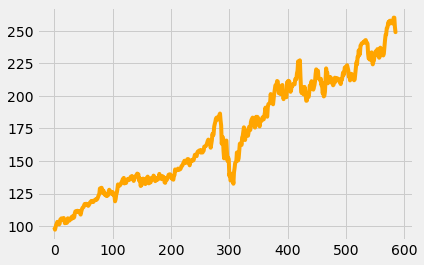

In [51]:
plt.plot(real_data, color = 'orange', label = 'Actual MSFT Price USD($)')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted MSFT Price($)')
plt.title('ML vs Predicted')
plt.xlabel('Time')
plt.ylabel('')